<a href="https://colab.research.google.com/github/qiuhuasheng1107/project_pytorch_exercise/blob/main/quest_exe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input*self.w00+self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01
        
        input_to_bottom_relu = input*self.w10+self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        
        return output

In [ ]:
model = BasicNN()

## print out the name and value for each parameter
for name, param in model.named_parameters():
    print(name, param.data)

w00 tensor(1.7000)
b00 tensor(-0.8500)
w01 tensor(-40.8000)
w10 tensor(12.6000)
b10 tensor(0.)
w11 tensor(2.7000)
final_bias tensor(-16)


In [ ]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [ ]:
model = BasicNN()
output_values = model(input_doses)

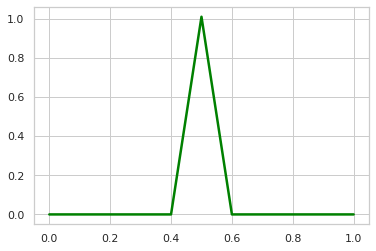

In [ ]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_values,color='green',linewidth=2.5)

In [ ]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
    
    def forward(self, input):
        input_to_top_relu = input*self.w00+self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01
        
        input_to_bottom_relu = input*self.w10+self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        
        return output

In [ ]:
model = BasicNN_train()
output_values = model(input_doses)

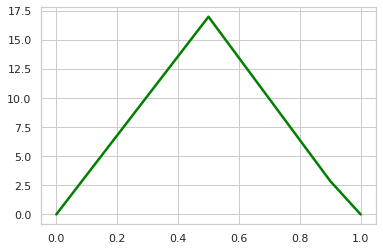

In [ ]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_values.detach(),color='green',linewidth=2.5)

In [ ]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [ ]:
optimizer = SGD(model.parameters(), lr=0.1)
print(str(model.final_bias.data)+'\n')

tensor(0.)



In [ ]:
for epoch in range(100):
  total_loss = 0

  for iteration in range(len(inputs)):
    input_i = inputs[iteration]
    label_i = labels[iteration]
    output_i = model(input_i)

    loss = (output_i-label_i)**2
    loss.backward()
    total_loss += float(loss)

  if (total_loss<0.0001):
    print('steps:'+str(epoch))
    break
  
  optimizer.step()
  optimizer.zero_grad()

  print("step:"+str(epoch)+'final bias:'+str(model.final_bias.data)+'\n')

step:0final bias:tensor(-3.2020)

step:1final bias:tensor(-5.7636)

step:2final bias:tensor(-7.8129)

step:3final bias:tensor(-9.4523)

step:4final bias:tensor(-10.7638)

step:5final bias:tensor(-11.8131)

step:6final bias:tensor(-12.6525)

step:7final bias:tensor(-13.3240)

step:8final bias:tensor(-13.8612)

step:9final bias:tensor(-14.2909)

step:10final bias:tensor(-14.6348)

step:11final bias:tensor(-14.9098)

step:12final bias:tensor(-15.1298)

step:13final bias:tensor(-15.3059)

step:14final bias:tensor(-15.4467)

step:15final bias:tensor(-15.5594)

step:16final bias:tensor(-15.6495)

step:17final bias:tensor(-15.7216)

step:18final bias:tensor(-15.7793)

step:19final bias:tensor(-15.8254)

step:20final bias:tensor(-15.8623)

step:21final bias:tensor(-15.8919)

step:22final bias:tensor(-15.9155)

step:23final bias:tensor(-15.9344)

step:24final bias:tensor(-15.9495)

step:25final bias:tensor(-15.9616)

step:26final bias:tensor(-15.9713)

step:27final bias:tensor(-15.9790)

step:2

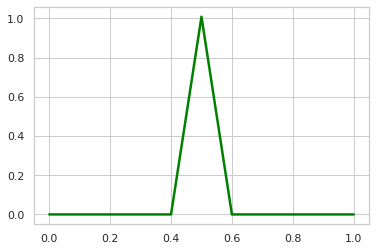

In [ ]:
output_values = model(input_doses)
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_values.detach(),color='green',linewidth=2.5)